# Intoduction to CV

In [2]:
# !pip install opencv-python

In [3]:
# Import OpenCV Library and check the version

import cv2
print (cv2.__version__)

4.7.0


In [36]:
# Load an color image in grayscale
import numpy as np

img = cv2.imread('/content/messi.jpg',0)

In [37]:
# cv2.imread will read the image in the numpy array

print(img)
print(img.shape)

[[ 66  66  66 ...  33  33  33]
 [ 66  66  66 ...  32  32  32]
 [ 65  65  65 ...  32  32  32]
 ...
 [164 164 164 ...  13  13  13]
 [169 169 169 ...  13  13  13]
 [173 173 173 ...  13  13  13]]
(168, 300)


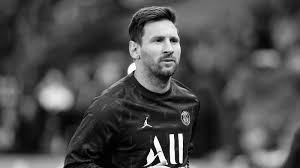

In [38]:
# Even if the image path is wrong, it won’t throw any error, but print img will give you None

from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [39]:
# Write an image

# Use the function cv2.imwrite() to save an image.

# First argument is the file name, second argument is the image you want to save.

cv2.imwrite('messigray.png',img)


True

## Using Matplotlib

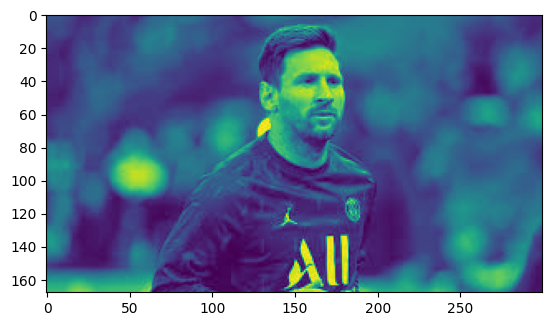

In [40]:
import matplotlib.pyplot as plt

img = cv2.imread('/content/messi.jpg',0)

plt.imshow(img)

[[[ 56  65  96]
  [ 55  66  98]
  [ 53  66  98]
  ...
  [ 34  31  38]
  [ 33  32  38]
  [ 33  32  38]]

 [[ 55  66  98]
  [ 53  66  98]
  [ 52  67 100]
  ...
  [ 33  30  37]
  [ 33  30  37]
  [ 33  30  37]]]
uint8


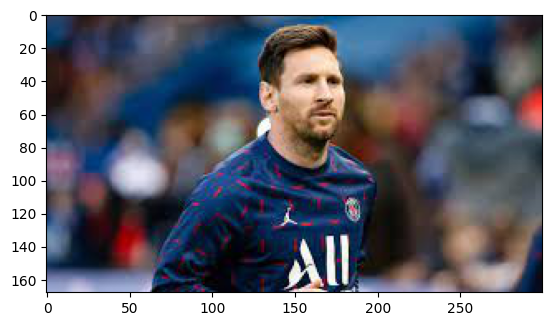

In [51]:
import matplotlib.image as mpimg

pltimg = mpimg.imread('messi.jpg')

print(pltimg[:2])
print(pltimg.dtype)

plt.imshow(pltimg)

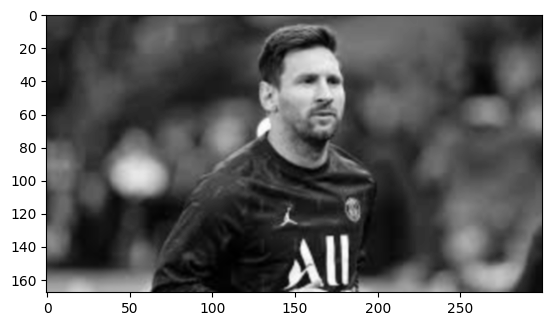

In [42]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

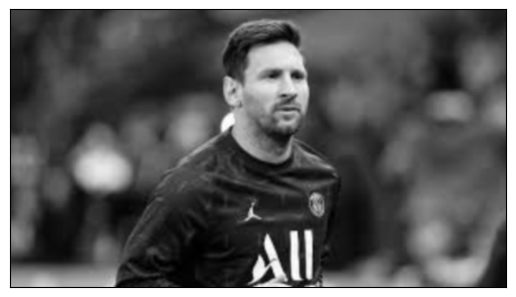

In [43]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

## Using PIL Library

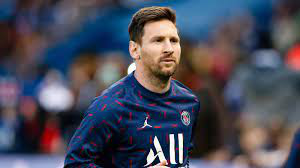

Filename                 : messi.jpg
Image Size               : (300, 168)
Image Height             : 168
Image Width              : 300
Image Format             : JPEG
Image Mode               : RGB
Image is Animated        : False
Frames in Image          : 1


In [64]:
from PIL import Image
from PIL.ExifTags import TAGS

# path to the image or video
imagename = "messi.jpg"

# read the image data using PIL
image = Image.open(imagename)

image.show()

# extract other basic metadata
info_dict = {
    "Filename": image.filename,
    "Image Size": image.size,
    "Image Height": image.height,
    "Image Width": image.width,
    "Image Format": image.format,
    "Image Mode": image.mode,
    "Image is Animated": getattr(image, "is_animated", False),
    "Frames in Image": getattr(image, "n_frames", 1)
}

for label,value in info_dict.items():
    print(f"{label:25}: {value}")

## Image to array and array to image in PIL Library

In [66]:
# path to the image or video
imagename = "messi.jpg"

# read the image data using PIL
image = Image.open(imagename)

print(image) # pil image will not read the image in the form of array as in case 
# of cv2, instead it read as an image object
# to convert the image read to numpy array we need use the np.asarry function

img1 = np.asarray(image)

print(img1.dtype)
# print(img1)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x168 at 0x7FC62EB47EE0>
uint8


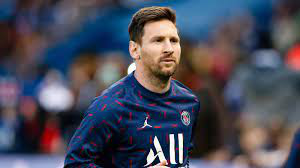

In [67]:
ary_img = Image.fromarray(img1)
ary_img.show()

# Operations in digital image processing.

## Affine Transformations
Affine transformations - Rotation, Translation, Shear, scaling

Affine transformations are geometric transformation that preserves lines and parallelism (but not necessarily distances and angles).

In [69]:
import pylab

In [88]:
def show_img(img):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

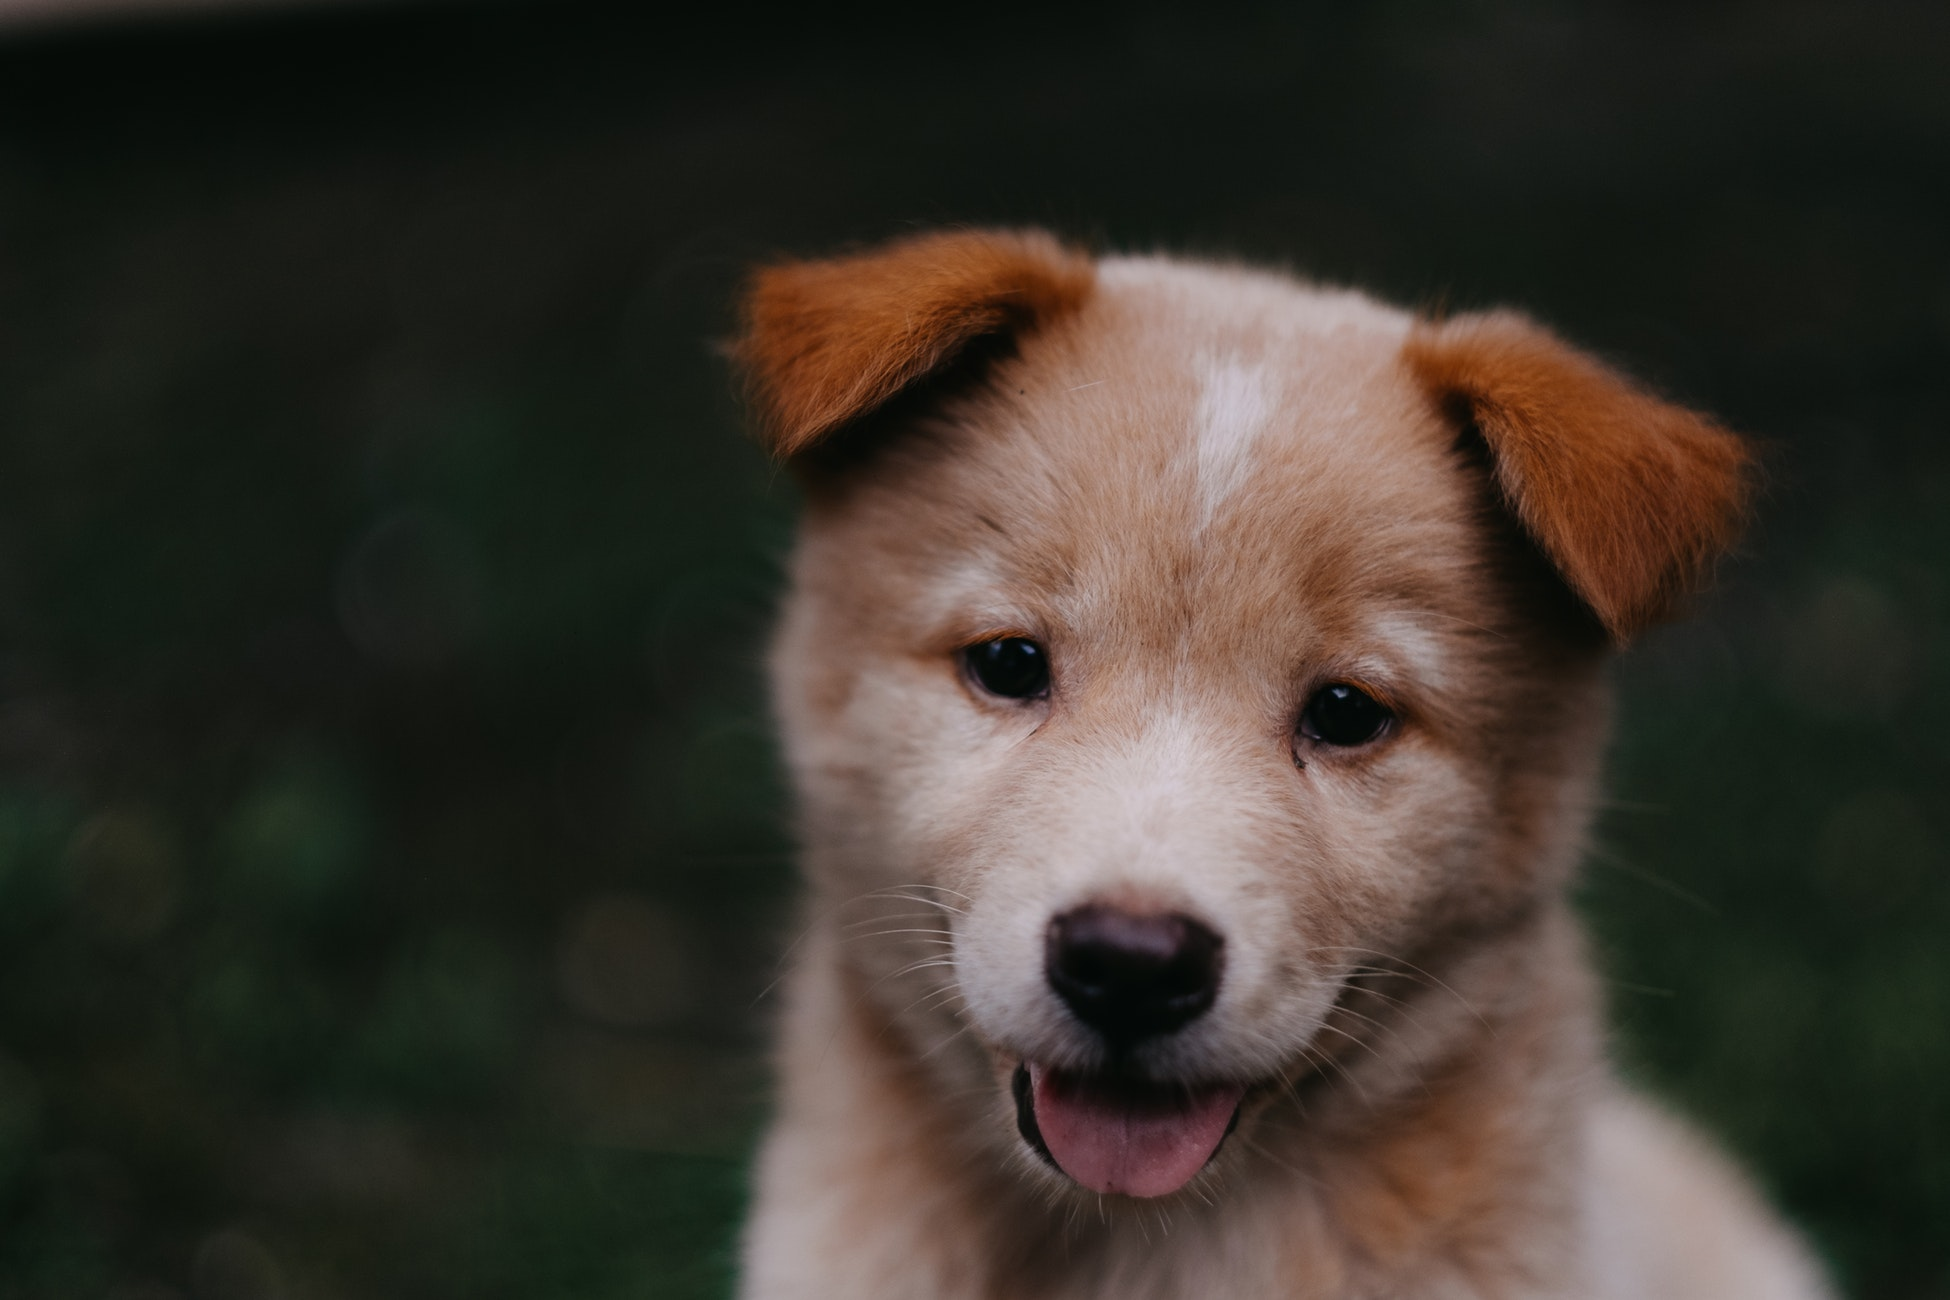

In [89]:
from google.colab.patches import cv2_imshow
mydog = cv2.imread("puppy.jpg")
cv2_imshow(mydog)

In [90]:
print(mydog.shape)

(1300, 1950, 3)


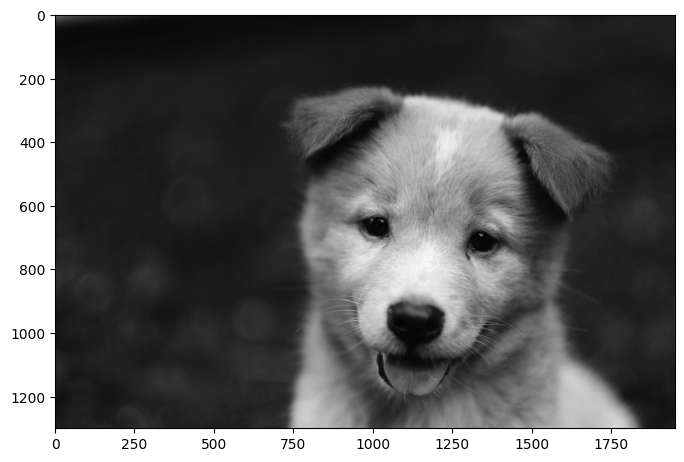

In [91]:
# Converting the colour image to grayscale

graydog = cv2.cvtColor(mydog, cv2.COLOR_BGR2GRAY)
show_img(graydog)

### Syntax for any affine transformation to be done


cv2.warpAffine(image, transformationmatrix, (width_transformedimage, height_transformedimage))

**Transformation matrix** 
[[a11, a12, b1],
[a21, a22, b2]]

**Rotation matrix**
[[cos(a), -sin(a), 0],
 [sin(a), cos(a), 0]]

**Changing a11 and a22 leads to ------> Scaling**

**Changing a12 and a21 leads to ------> Shearing**

**changing b1 and b2 will lead to translation ------> Translation**

In [96]:
height, width = graydog.shape[:2]
dogcenter = height/2,width/2

### Rotation

In [97]:
rotate_matrix = cv2.getRotationMatrix2D(center = dogcenter, angle = 45, scale = 1)

In [98]:
rotated_dog = cv2.warpAffine(graydog.copy(),rotate_matrix, (width, height))

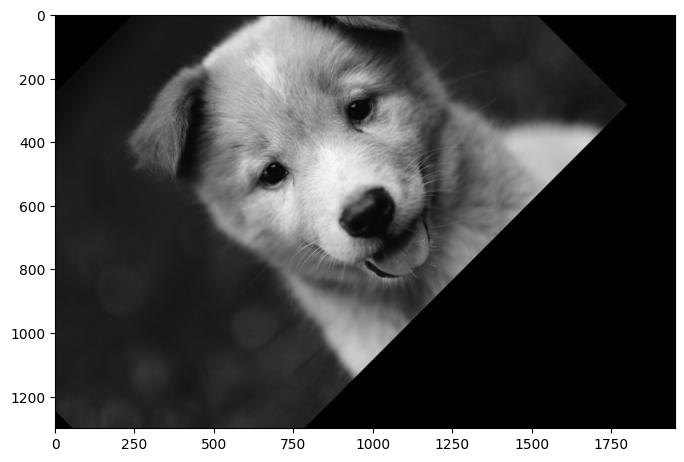

In [99]:
show_img(rotated_dog)

### Translation

In [100]:
horizontalshift = width/2
verticalshift = 0
translation_matrix = np.array([
                               [1,0, horizontalshift],
                               [0,1, verticalshift]
], dtype = np.float32)

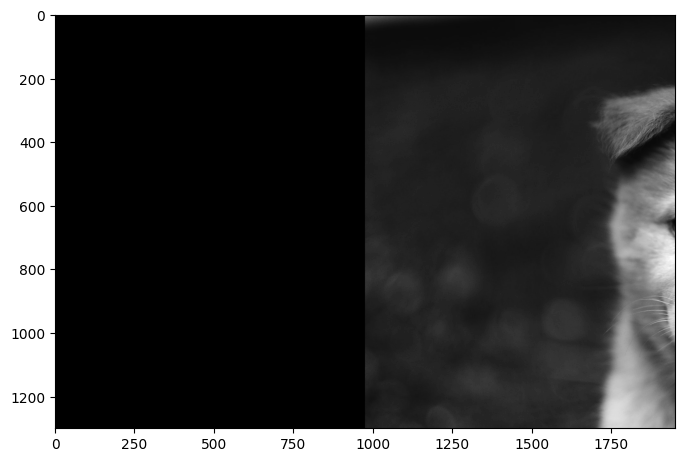

In [101]:
translation_dog = cv2.warpAffine(graydog.copy(), translation_matrix, (width, height))
show_img(translation_dog)

### Scaling

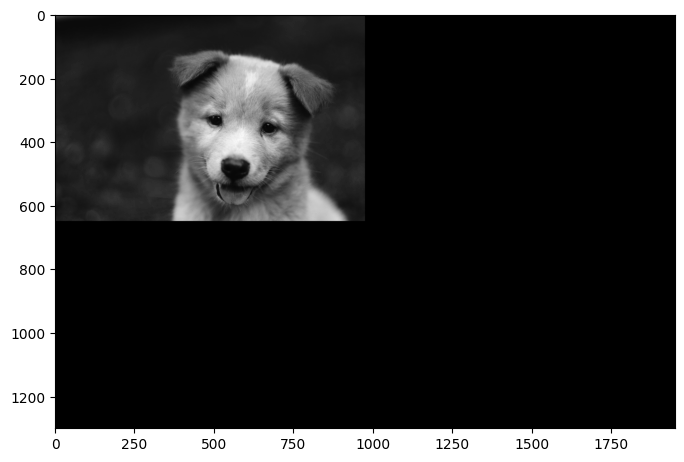

In [102]:
horizontalscalefactor = 0.5
verticalscalefactor = 0.5
scaling_matrix = np.array([
                               [horizontalscalefactor,0, 0],
                               [0,verticalscalefactor, 0]
], dtype = np.float32)
scaling_dog = cv2.warpAffine(graydog.copy(), scaling_matrix, (width, height))
show_img(scaling_dog)

### Shearing
Shear tool is used to shift one part of an image, a layer, a selection or a path to a direction and the other part to the opposite direction. For instance, a horizontal shearing will shift the upper part to the right and the lower part to the left. A rectangle becomes a diamond.

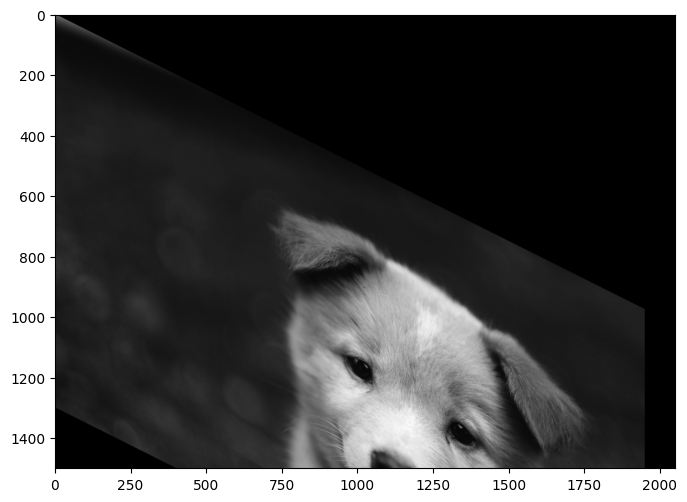

In [103]:
shearing_matrix = np.array([
                            [1,0, 0],
                            [0.5,1, 0]
], dtype = np.float32)
shearing_dog = cv2.warpAffine(graydog.copy(), shearing_matrix, (width+100, height+200))
show_img(shearing_dog)

## Morphological Operations

Morphology generally concerned with shape and properties of objects. 
Two basic operations are Erosion and Dilation.

Dilation: Adds pixels to the boundaries of objects in an image. (expanding shapes)

Erosion: Removes pixels on object boundaries.

The number of pixels added or removed from the objects in an image depends on the size and shape of the structuring element used to process the image.

A structuring element is a shape mask used in the basic morphological operations. They can be any shape and size that is digitally representable, and each has an origin.

In [105]:
# creating and image with ABCDE alphabets to understand morphological operations
def read_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,
                color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

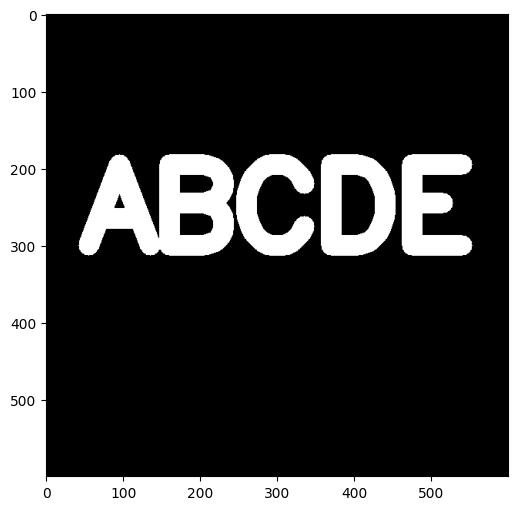

In [106]:
img = read_img()
show_img(img)

### Dialation

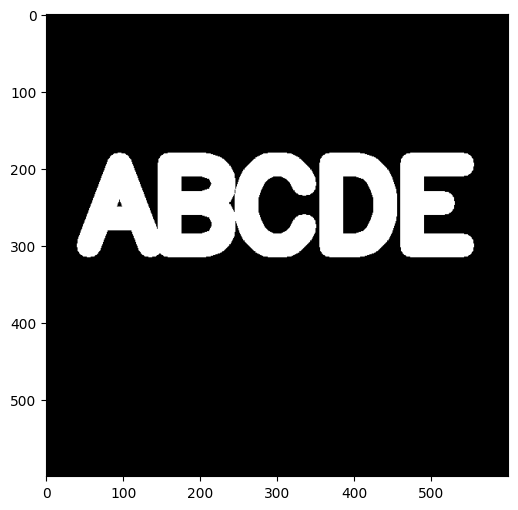

In [107]:
structElement = np.ones((5,5),np.uint8)
dilation1 = cv2.dilate(img,structElement,iterations = 1)

show_img(dilation1)

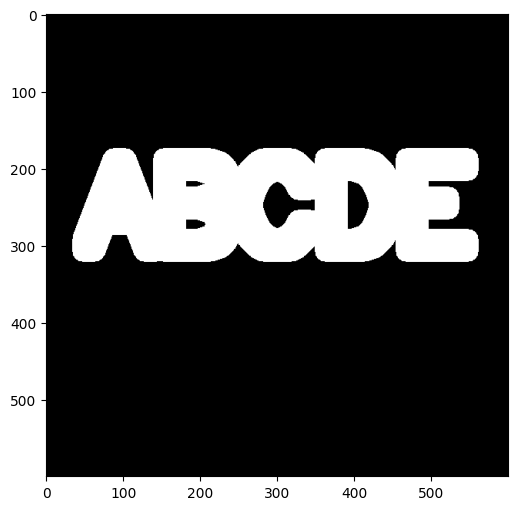

In [108]:
img = read_img()
structElement = np.ones((5,5),np.uint8)
dilation4 = cv2.dilate(img,structElement,iterations = 4)

show_img(dilation4)

### Erosion

Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.


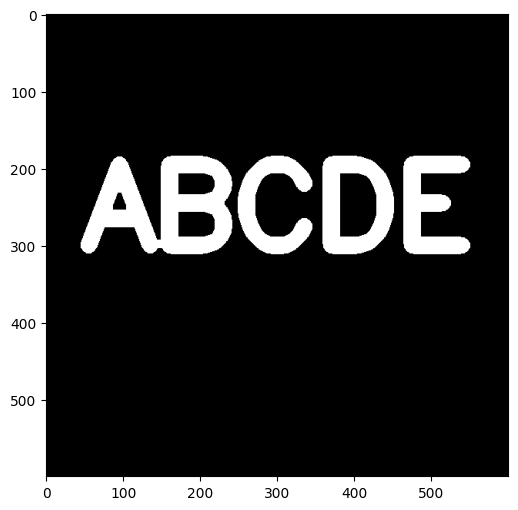

In [110]:
structElement = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(img,structElement,iterations = 1)

show_img(erosion1)

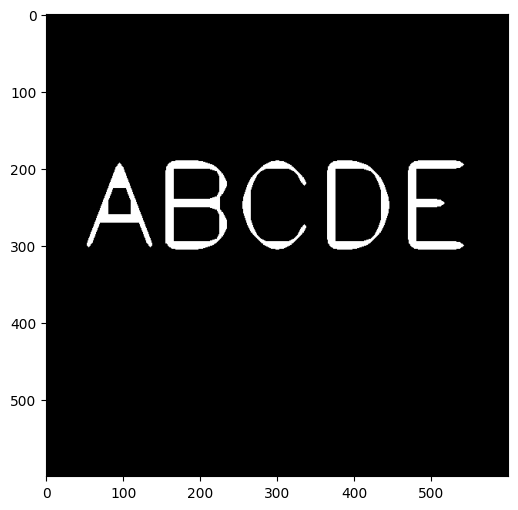

In [111]:
img = read_img()
structElement = np.ones((5,5),np.uint8)
erosion4 = cv2.erode(img,structElement,iterations = 4)

show_img(erosion4)

### Opening
Opening is erosion followed by dilation. Useful in removing background noise!


In [112]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

white_noise

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]])

In [113]:
white_noise = white_noise*255

white_noise

array([[  0,   0,   0, ...,   0,   0, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [255,   0, 255, ..., 255,   0,   0],
       ...,
       [  0, 255, 255, ...,   0,   0, 255],
       [  0, 255, 255, ...,   0,   0,   0],
       [255,   0,   0, ..., 255,   0,   0]])

In [114]:
print(white_noise.shape)

print(img.shape)

(600, 600)
(600, 600)


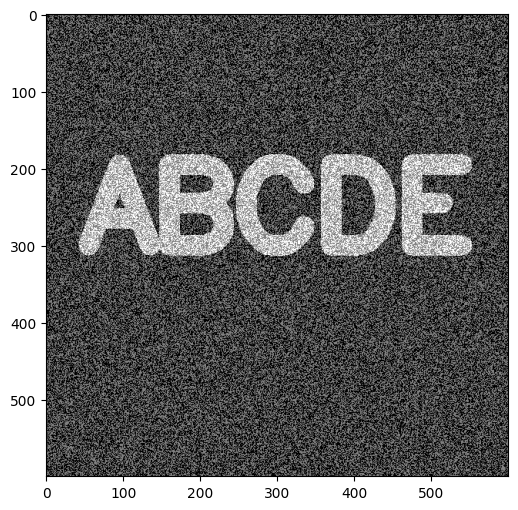

In [115]:
noise_img = white_noise+img

show_img(noise_img)

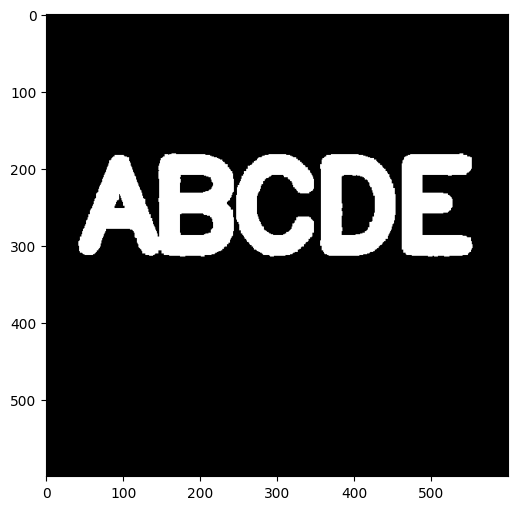

In [116]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, structElement)

show_img(opening)

### Closing
 Useful in removing noise from foreground objects, such as black dots on top of the white text.


In [117]:
img = read_img()

black_noise = np.random.randint(low=0,high=2,size=(600,600))

black_noise

array([[1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [118]:
black_noise= black_noise * -255

black_noise_img = img + black_noise

black_noise_img

array([[-255.,    0.,    0., ..., -255.,    0.,    0.],
       [   0.,    0.,    0., ..., -255.,    0., -255.],
       [   0.,    0., -255., ..., -255.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ..., -255.,    0.,    0.],
       [   0., -255.,    0., ..., -255., -255.,    0.],
       [   0.,    0.,    0., ...,    0.,    0., -255.]])

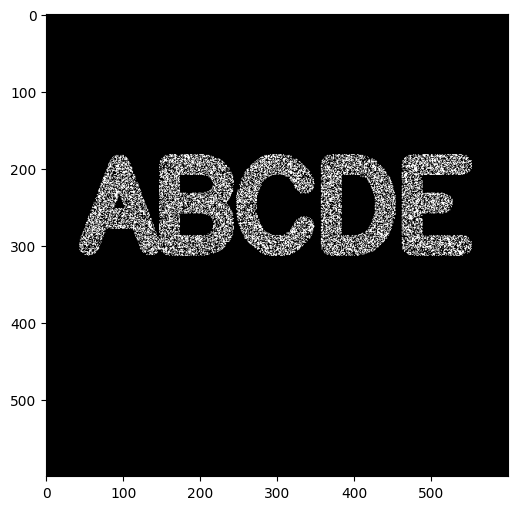

In [119]:
black_noise_img[black_noise_img==-255] = 0

show_img(black_noise_img)

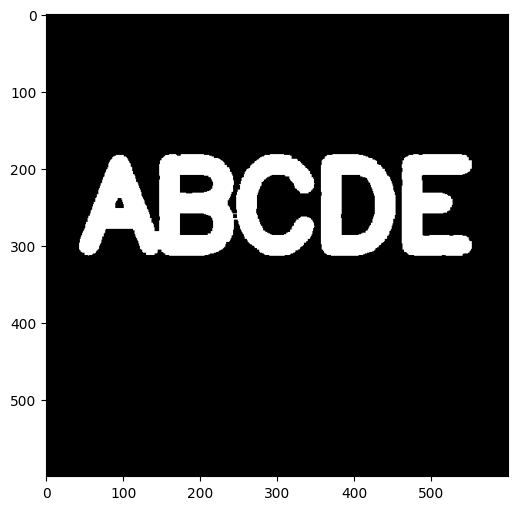

In [120]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, structElement)

show_img(closing)

### Morphological Gradient

Difference between dilation and erosion of an image.

Morphological Gradient is the operation that is equal to the difference between dilation and erosion of an image. Each pixel value in the resulting image indicates the contrast intensity in the nearby pixels. This is used in edge detection, segmentation and to find the outline of an object. (the gradient is the derivative of a multi-variable function)


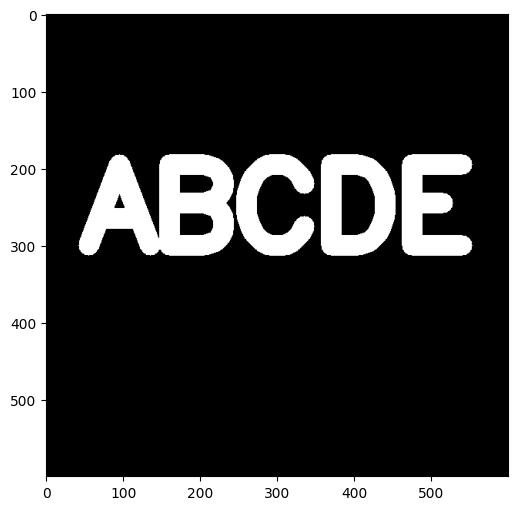

In [121]:
img = read_img()

show_img(img)

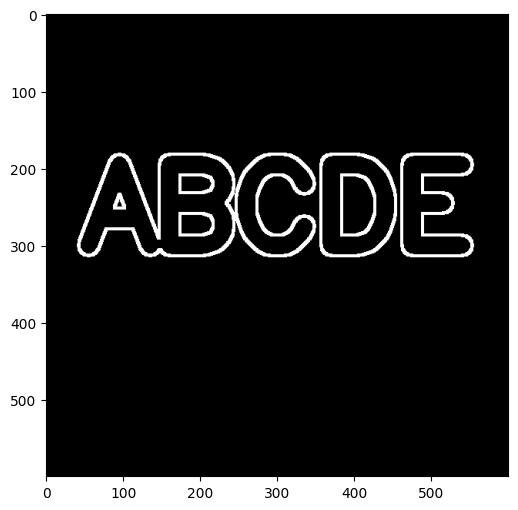

In [122]:
kernel = np.ones((5,5), np.uint8)

gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

show_img(gradient)

## **Histogram Equalization:**

Basically , Histogram tells  us that , How many times a particular element or things have appeared ,nothing but the count or frequency 

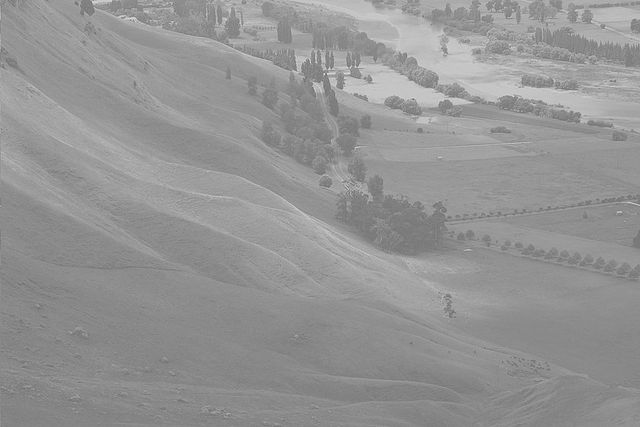

In [123]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt 

image=cv2.imread("/content/Hawkes_Bay_NZ.jpg",0)

cv2_imshow(image)

In [124]:
print(image.shape)
print('Total Number Of Pixels In GRAYSCALE Image:', image.shape[0] * image.shape[1])

(427, 640)
Total Number Of Pixels In GRAYSCALE Image: 273280


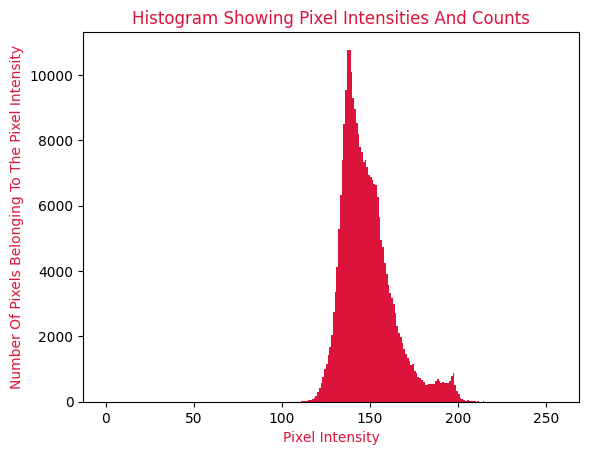

In [125]:
# Histogram Plot

import matplotlib.pyplot as plt
plt.hist(x=image.ravel(), bins=256, range=[0, 256], color='crimson')
plt.title("Histogram Showing Pixel Intensities And Counts", color='crimson')
plt.ylabel("Number Of Pixels Belonging To The Pixel Intensity", color="crimson")
plt.xlabel("Pixel Intensity", color="crimson")
plt.show()

Implementing histogram equalization

It's effortless to equalize a histogram of an image. The function cv2.equalizeHist() does the job for us. We have to pass the skewed image as input. The function returns a new image with adjusted contrast.

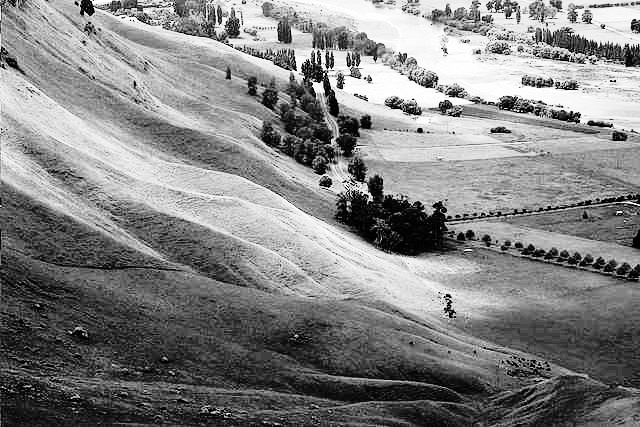

In [126]:
image_enhanced = cv2.equalizeHist(src=image)
cv2_imshow(image_enhanced)

Comparing original and histequalised image


([], [])

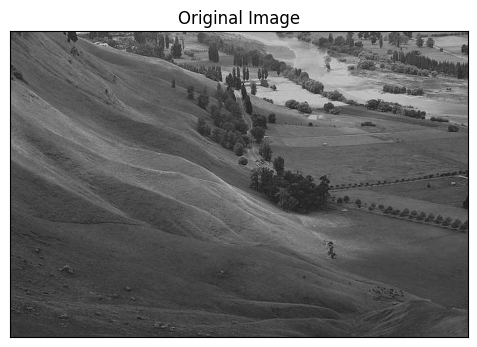

In [127]:
plt.figure(figsize=(13,5)) 

plt.subplot(1,2,1) 

plt.imshow(image,cmap = 'gray') 

plt.title('Original Image') 

plt.xticks([]) 

plt.yticks([]) 

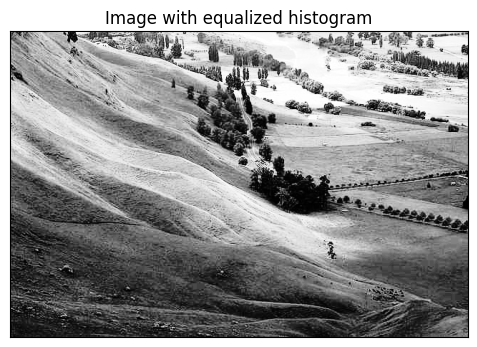

<Figure size 640x480 with 0 Axes>

In [128]:
plt.figure(figsize=(13,5)) 
plt.subplot(1,2,2) 

plt.imshow(image_enhanced,cmap = 'gray') 

plt.title('Image with equalized histogram') 

plt.xticks([]), plt.yticks([]) 
plt.show() 

plt.tight_layout() 
plt.show()


In [129]:
plt.hist(image_enhanced.ravel(), 256, [0,300], color="blue")
plt.title("Pixel Intensities And Counts In Enhanced Image", color="crimson")
plt.ylabel("Number Of Pixels Belonging To Pixel Intensity", color="crimson")
plt.xlabel("Pixel Intensity", color="crimson")
plt.show()

## **Binary Thresholding:**

The basic Thresholding technique is Binary Thresholding. For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value.
The different Simple Thresholding Techniques are: 

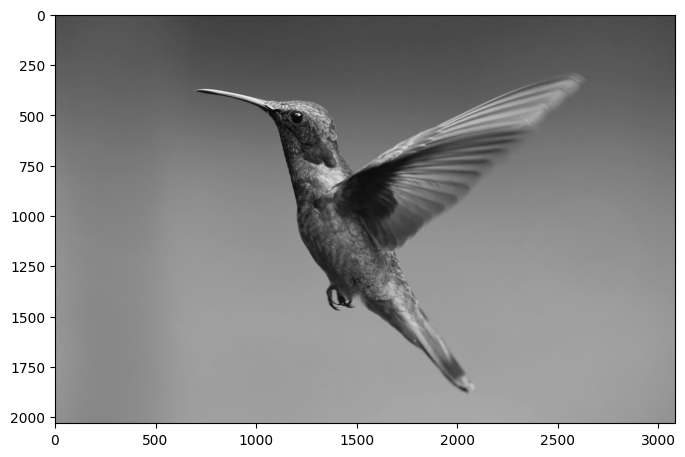

In [130]:
img=cv2.imread("/content/hummingbird.jpeg",0)
show_img(img)

**cv2.THRESH_BINARY**: If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).

**cv2.THRESH_BINARY_INV**: Inverted or Opposite case of cv2.THRESH_BINARY.

**cv.THRESH_TRUNC**: If pixel intensity value is greater than threshold, it is truncated to the threshold. The pixel values are set to be the same as the threshold. All other values remain the same.

**cv.THRESH_TOZERO**: Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value.

**cv.THRESH_TOZERO_INV**: Inverted or Opposite case of cv2.THRESH_TOZERO.
 

In [131]:
# applying different thresholding
# techniques on the input image
# all pixels value above 120 will
# max pixel value 255
ret, thresh1 = cv2.threshold(img, 120,  255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 120,  255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 120,  255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 120,  255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 120,  255,  cv2.THRESH_TOZERO_INV)

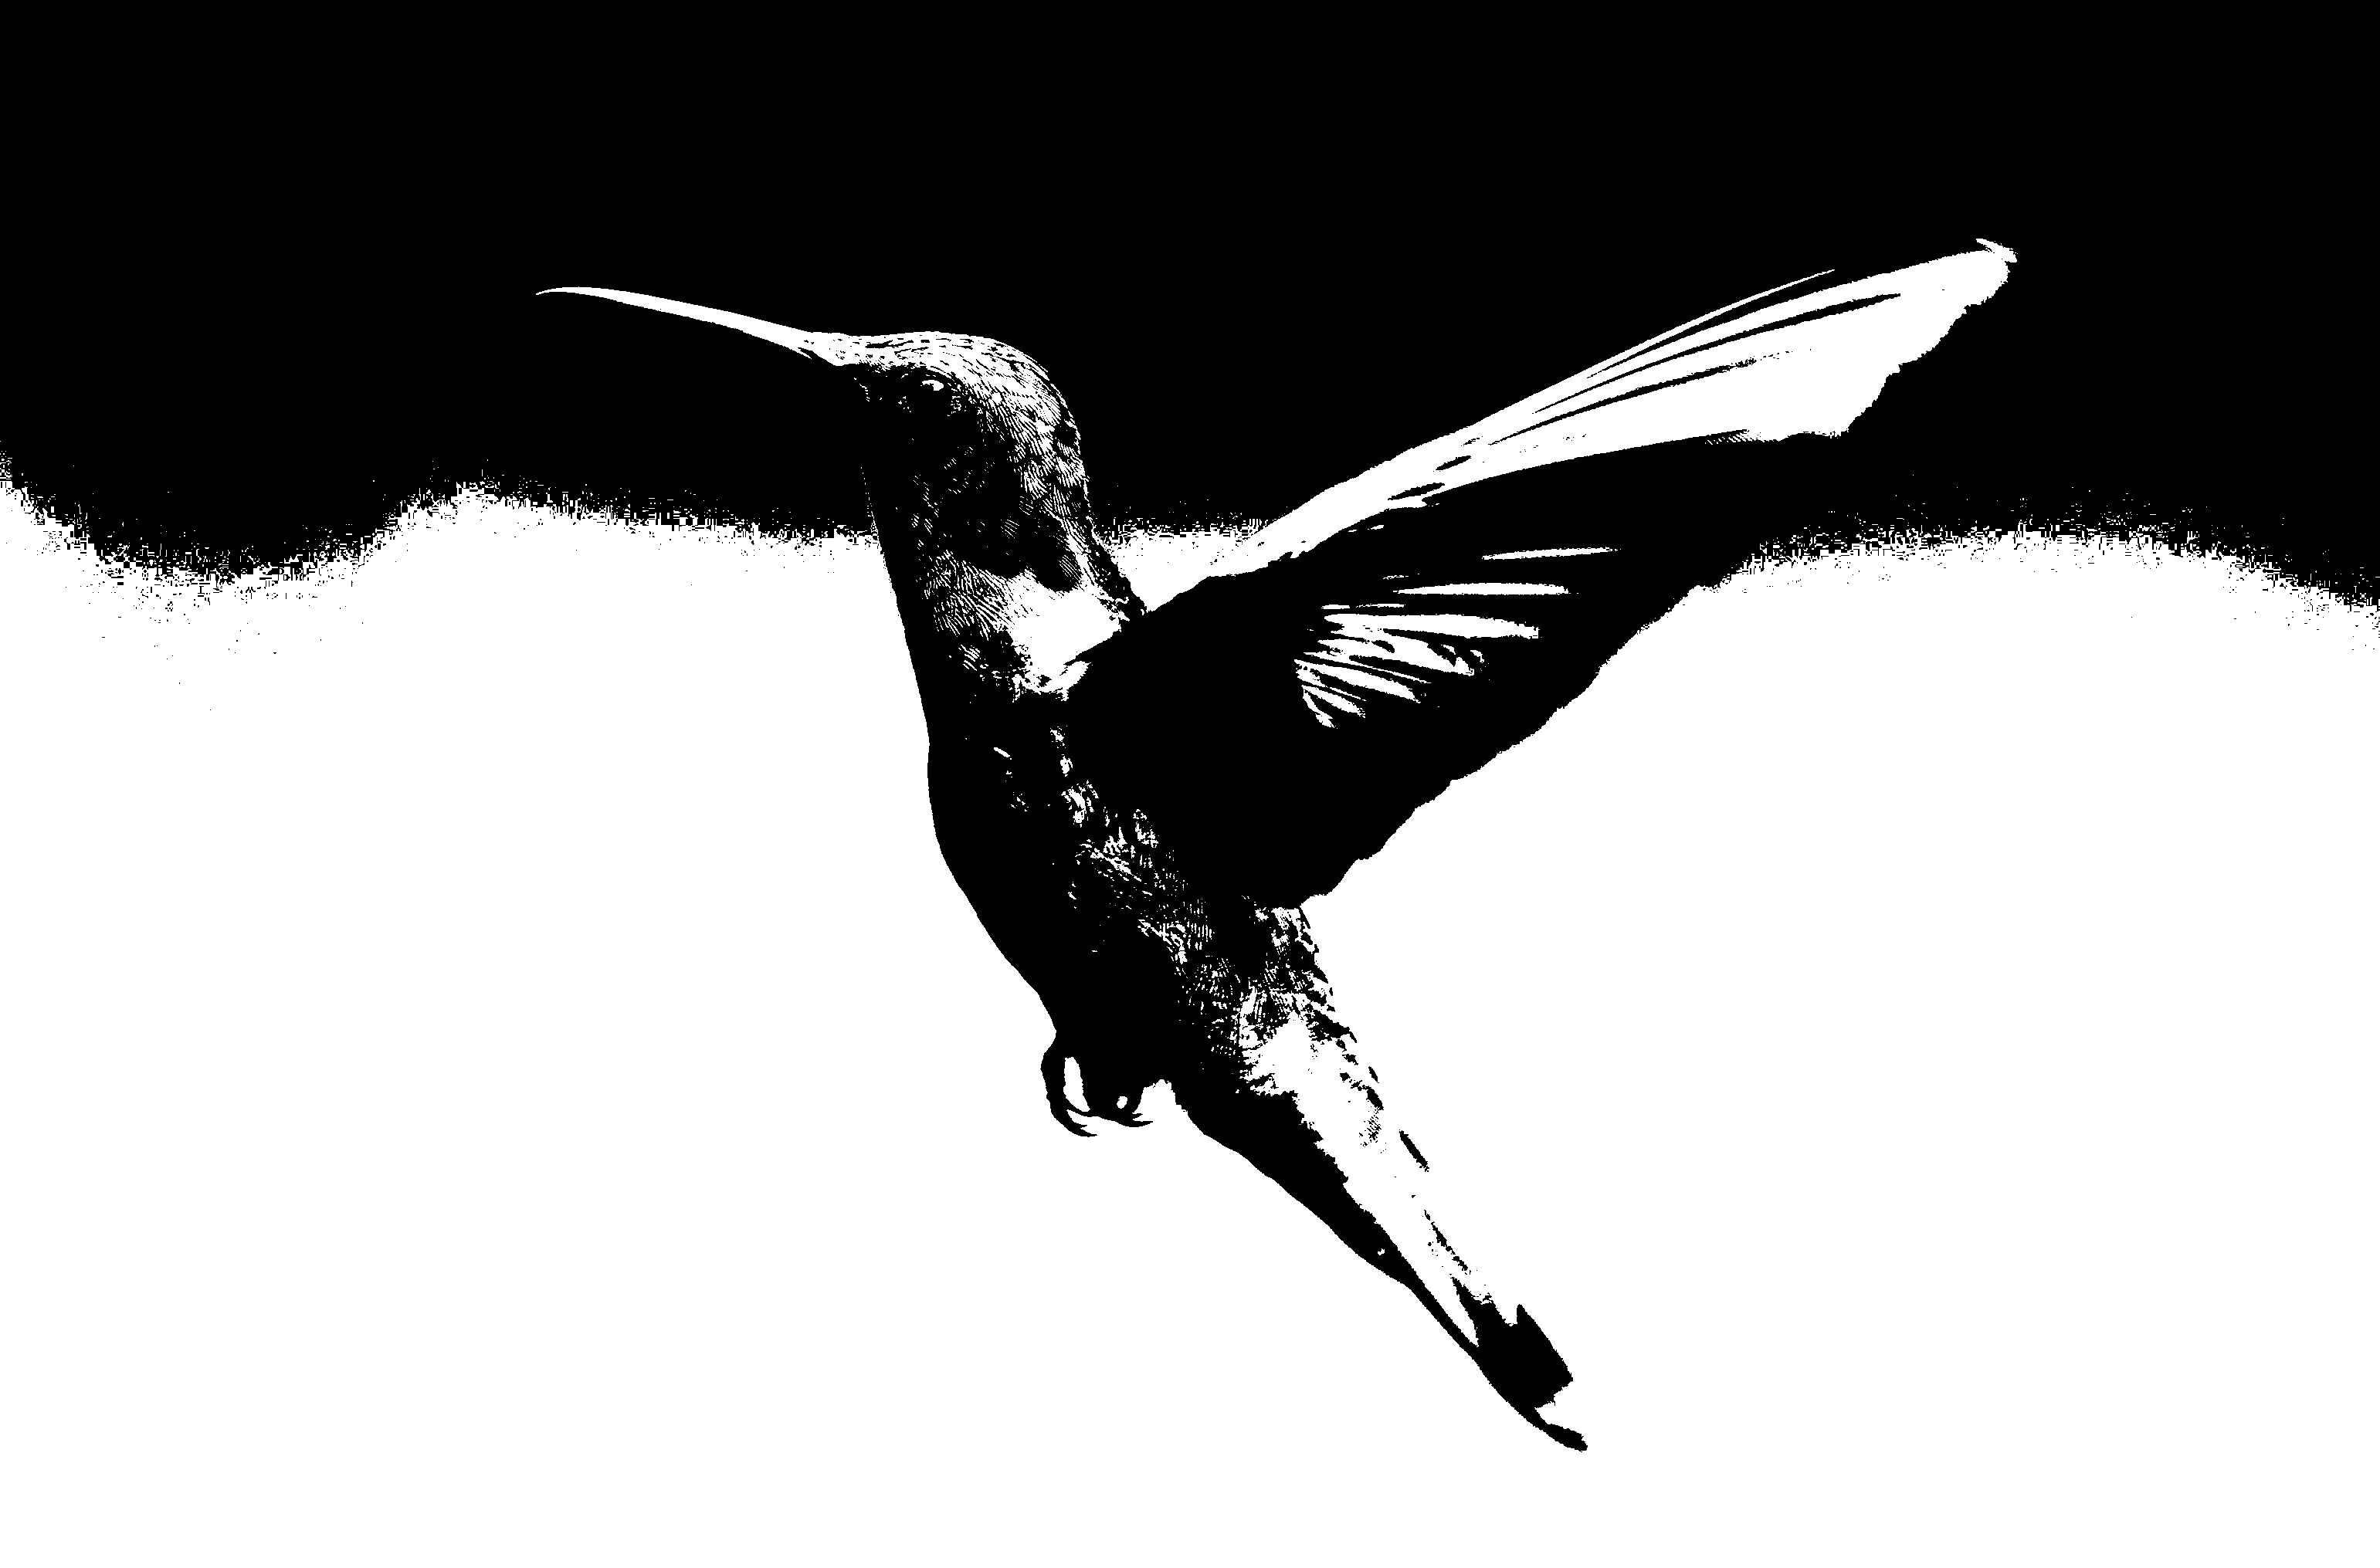

In [132]:
cv2_imshow(thresh1) #'Binary Threshold'


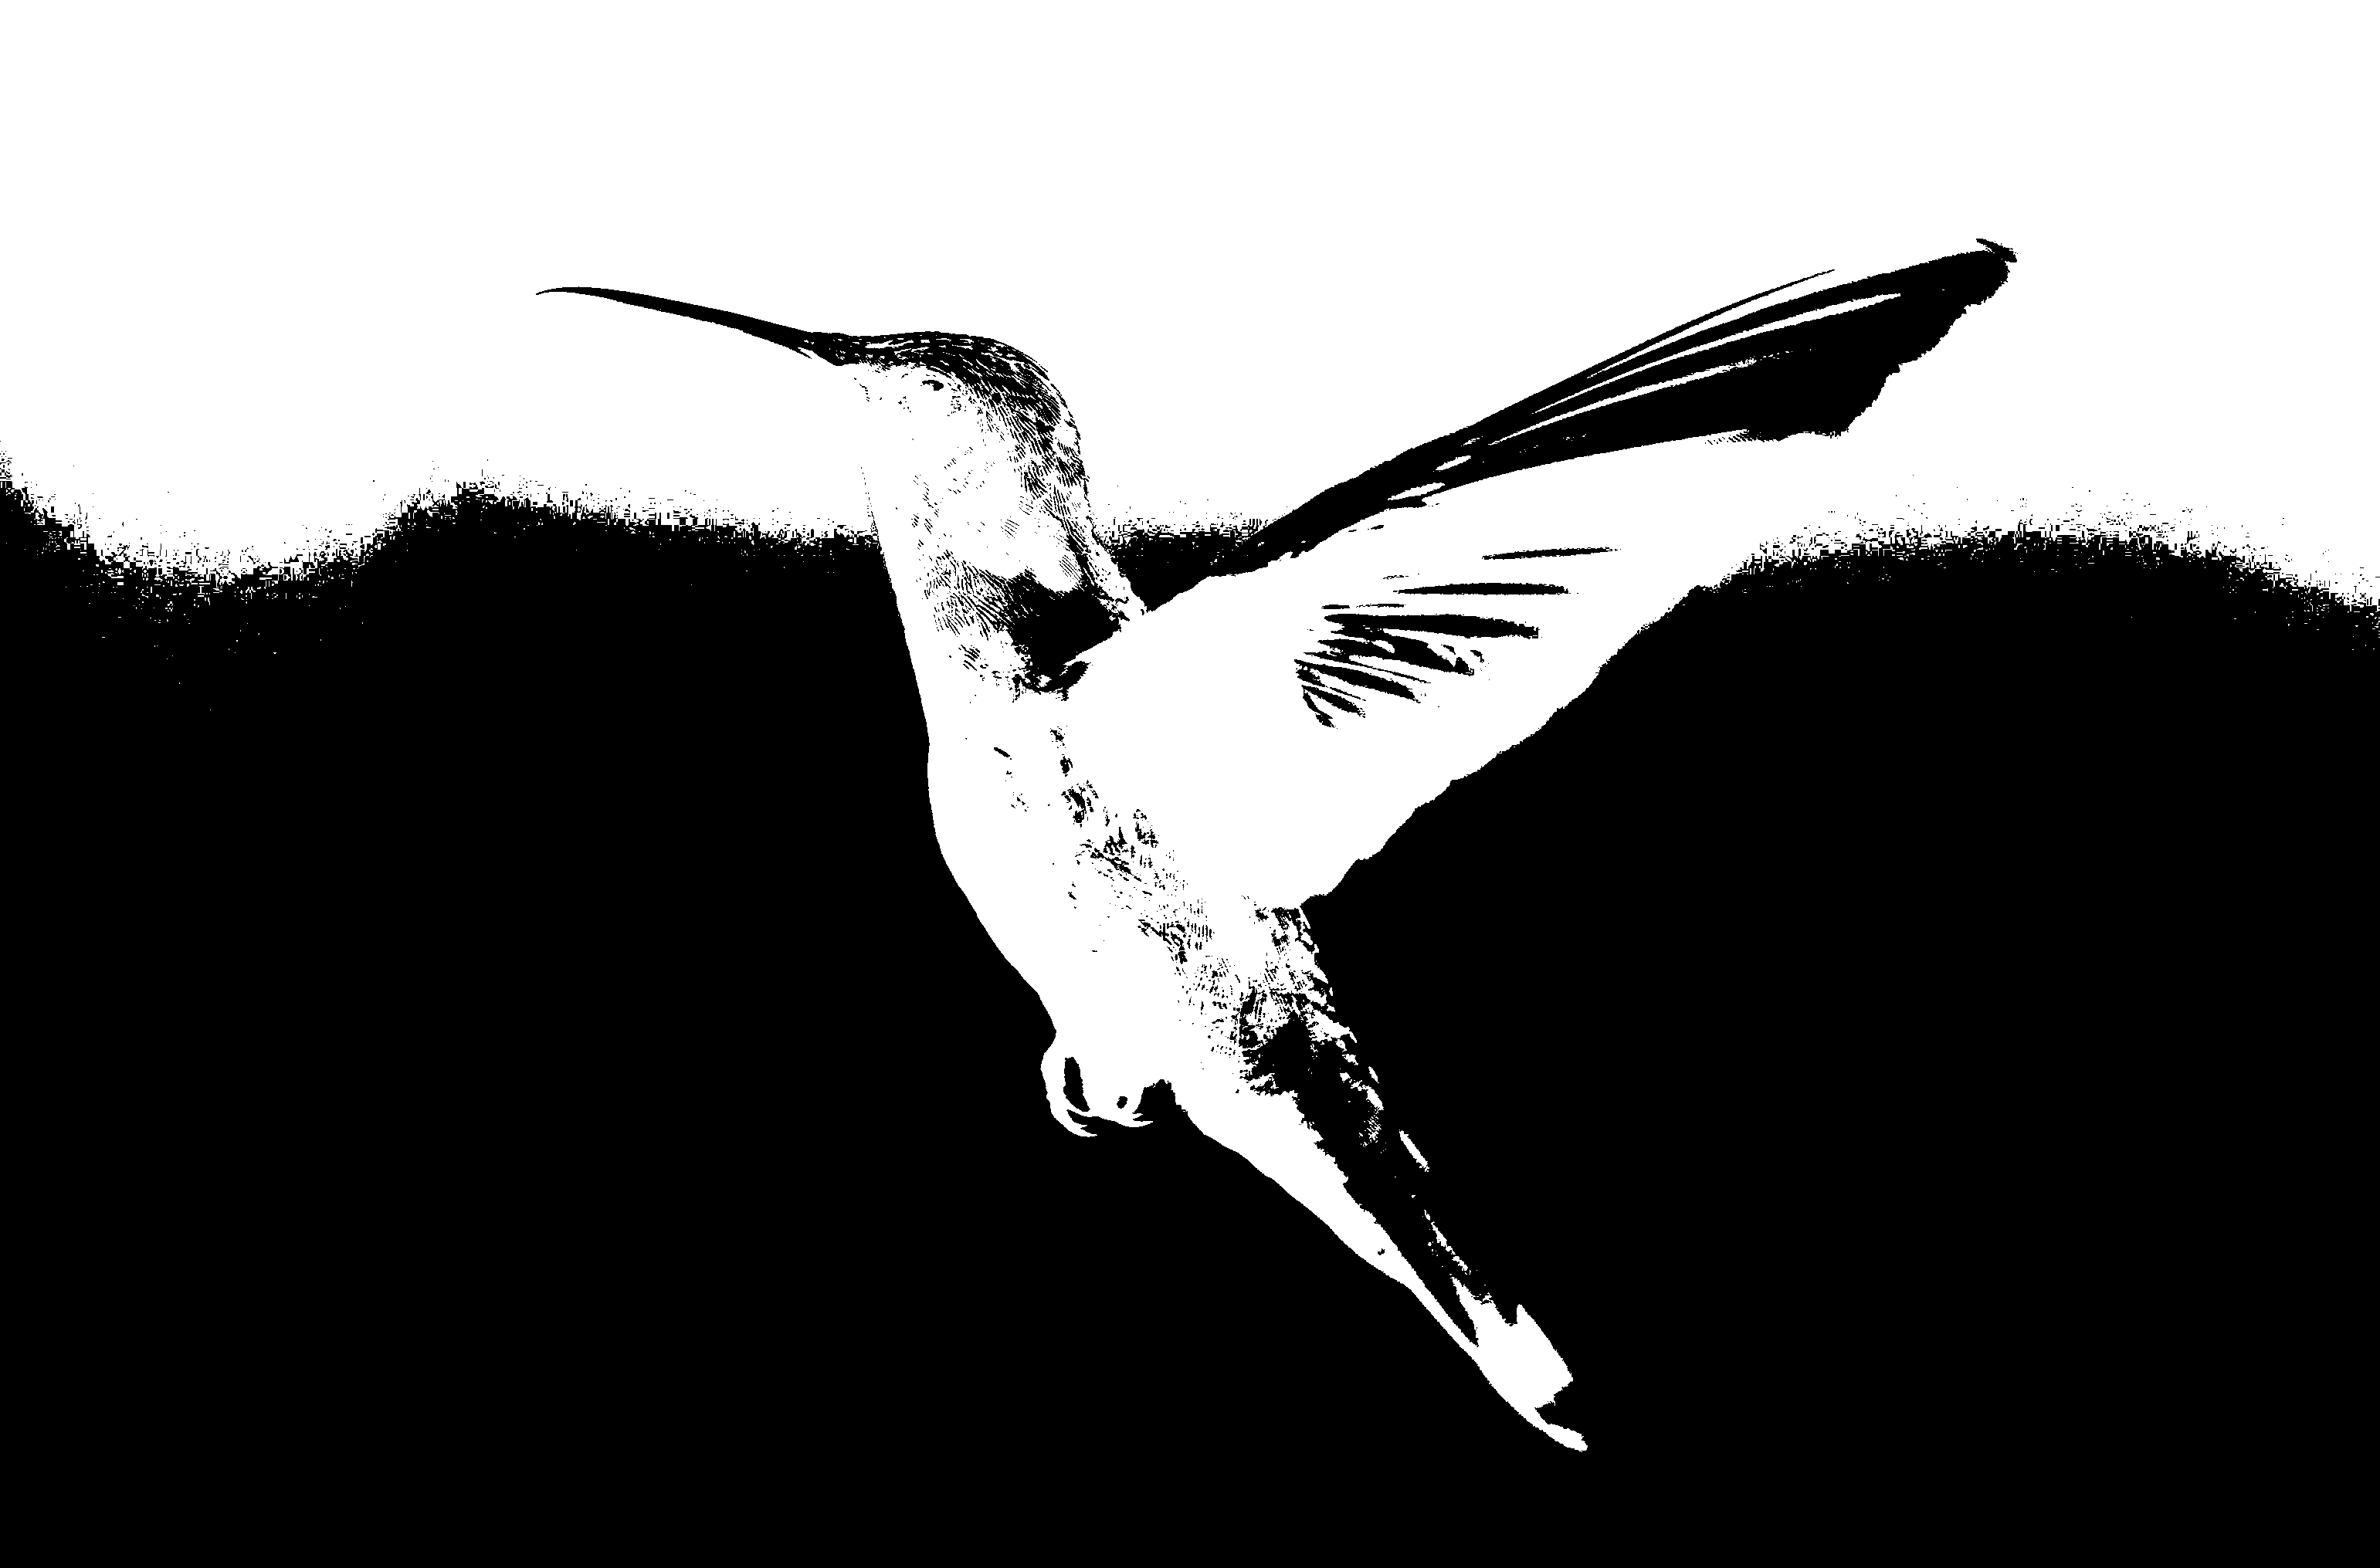

In [133]:

cv2_imshow(thresh2) #Binary Threshold Inverted'


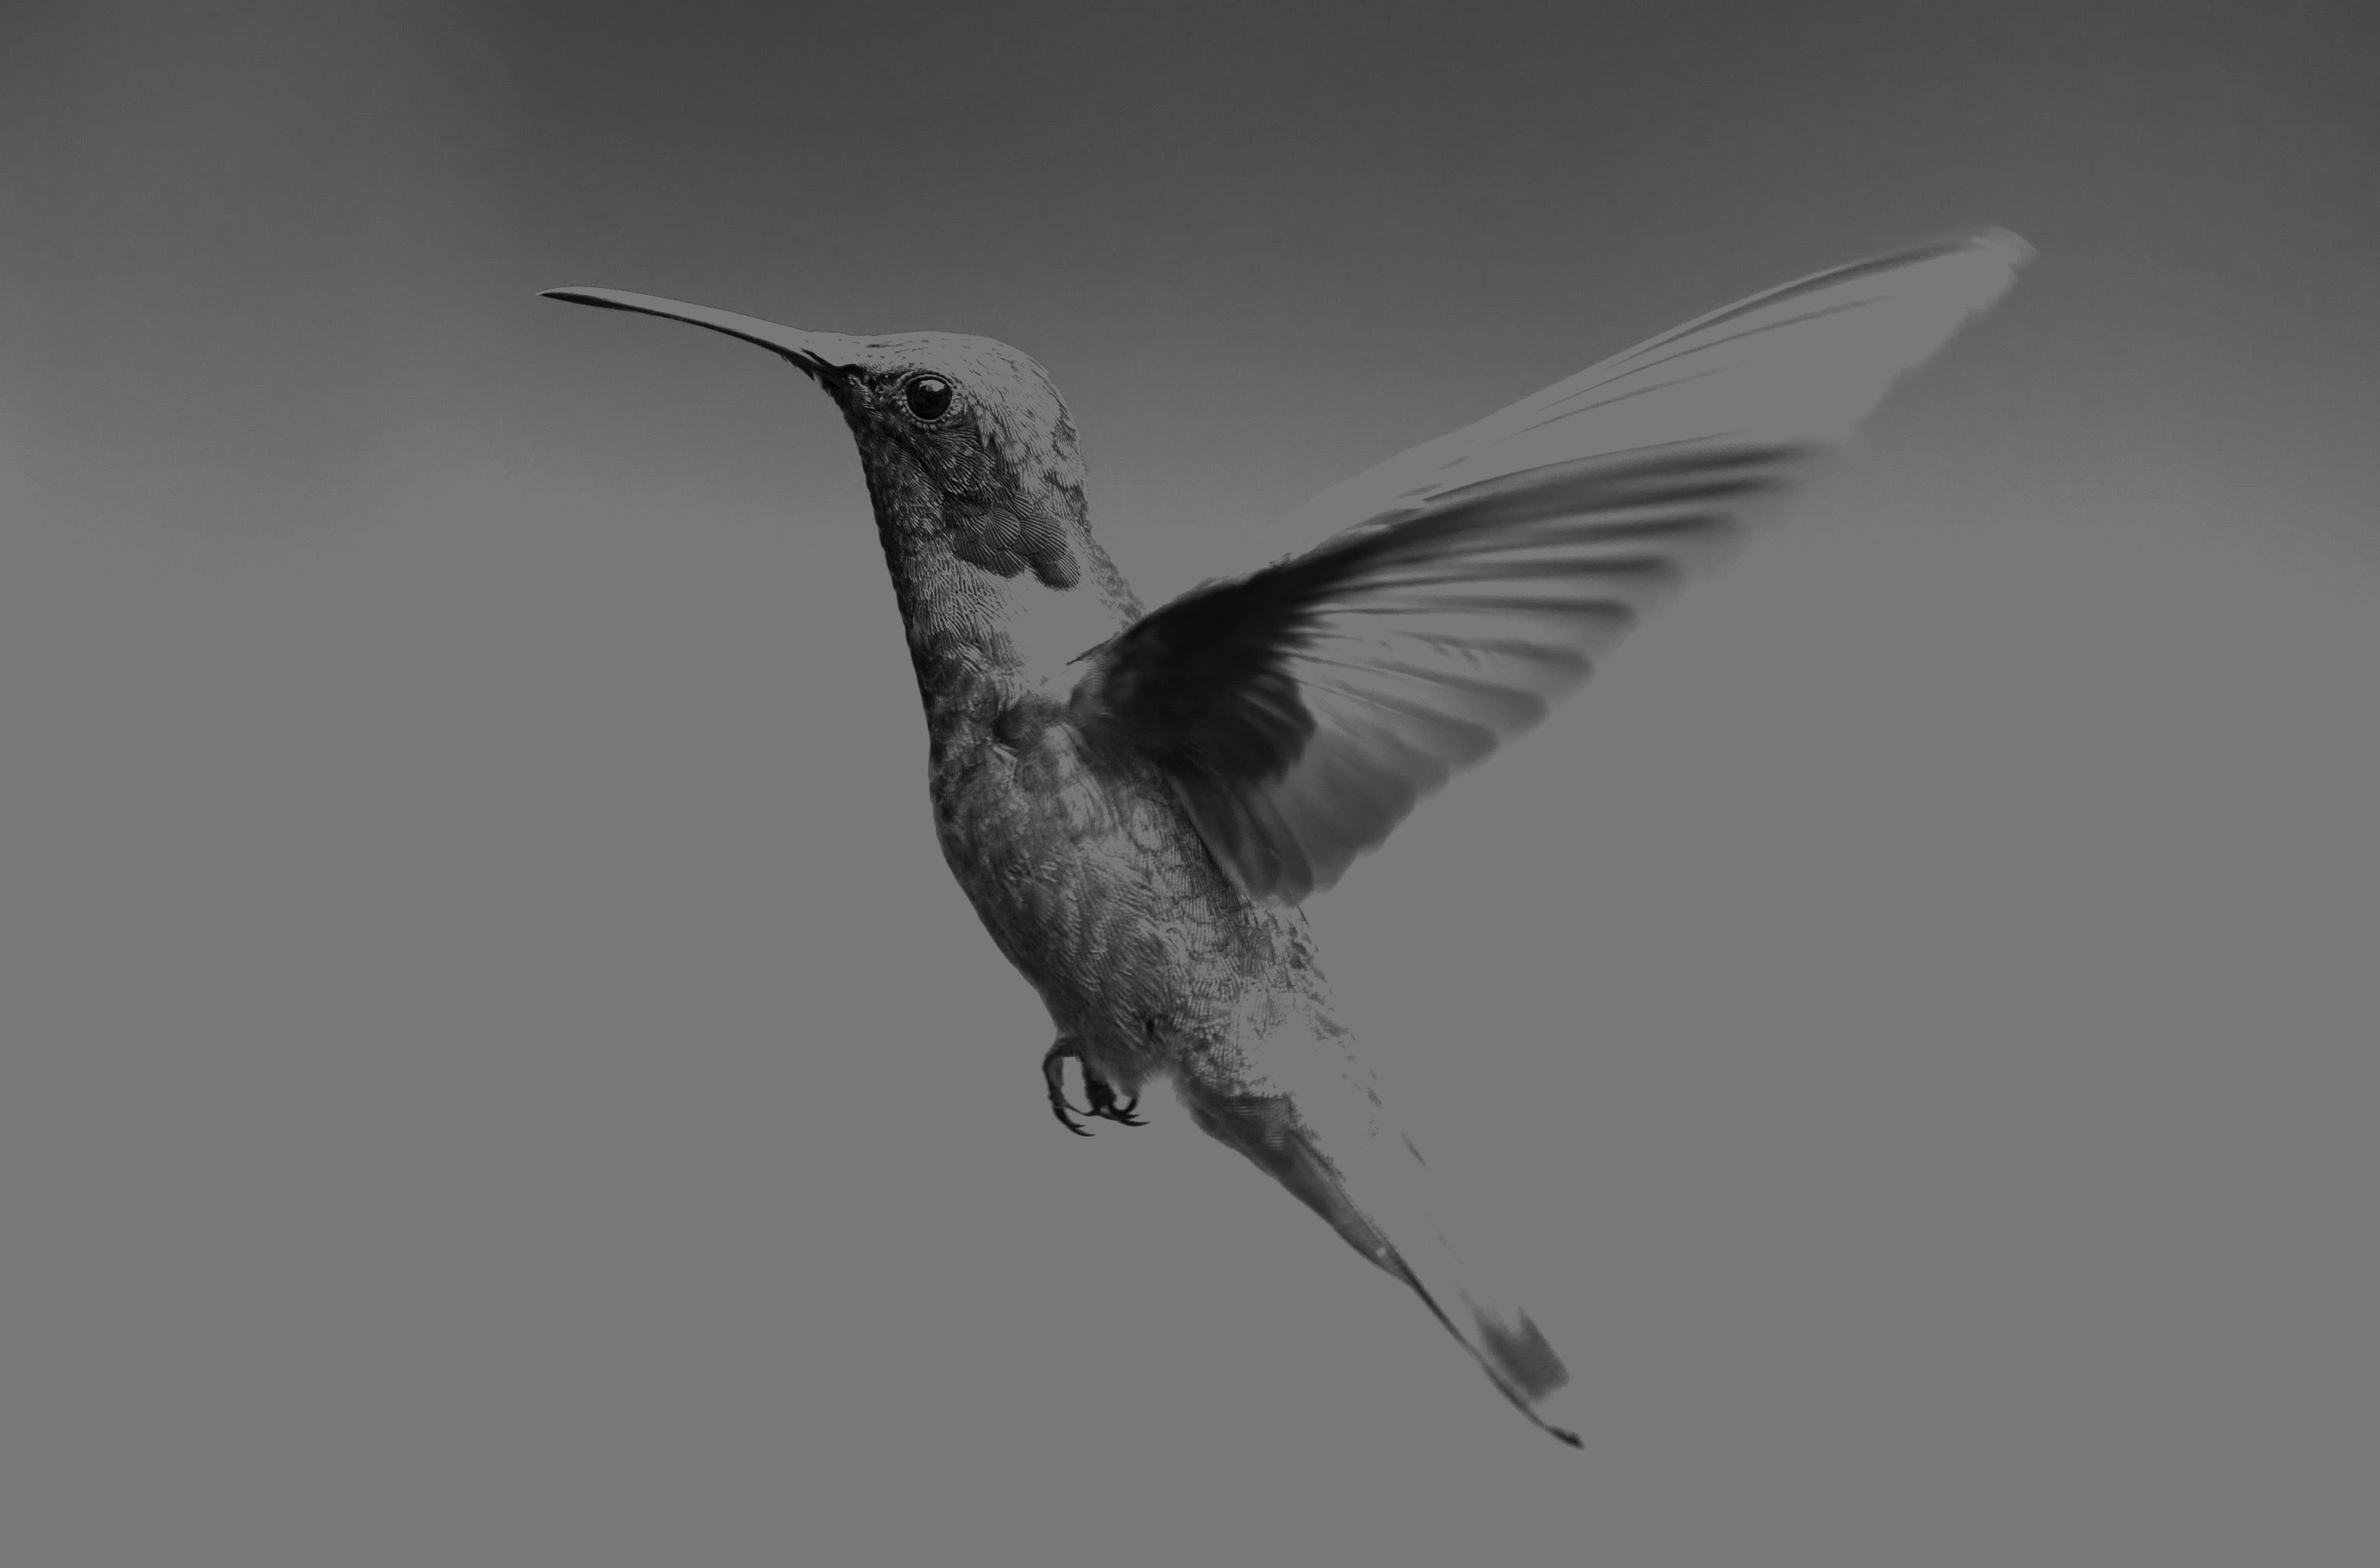

In [134]:

cv2_imshow(thresh3) #'Truncated Threshold',


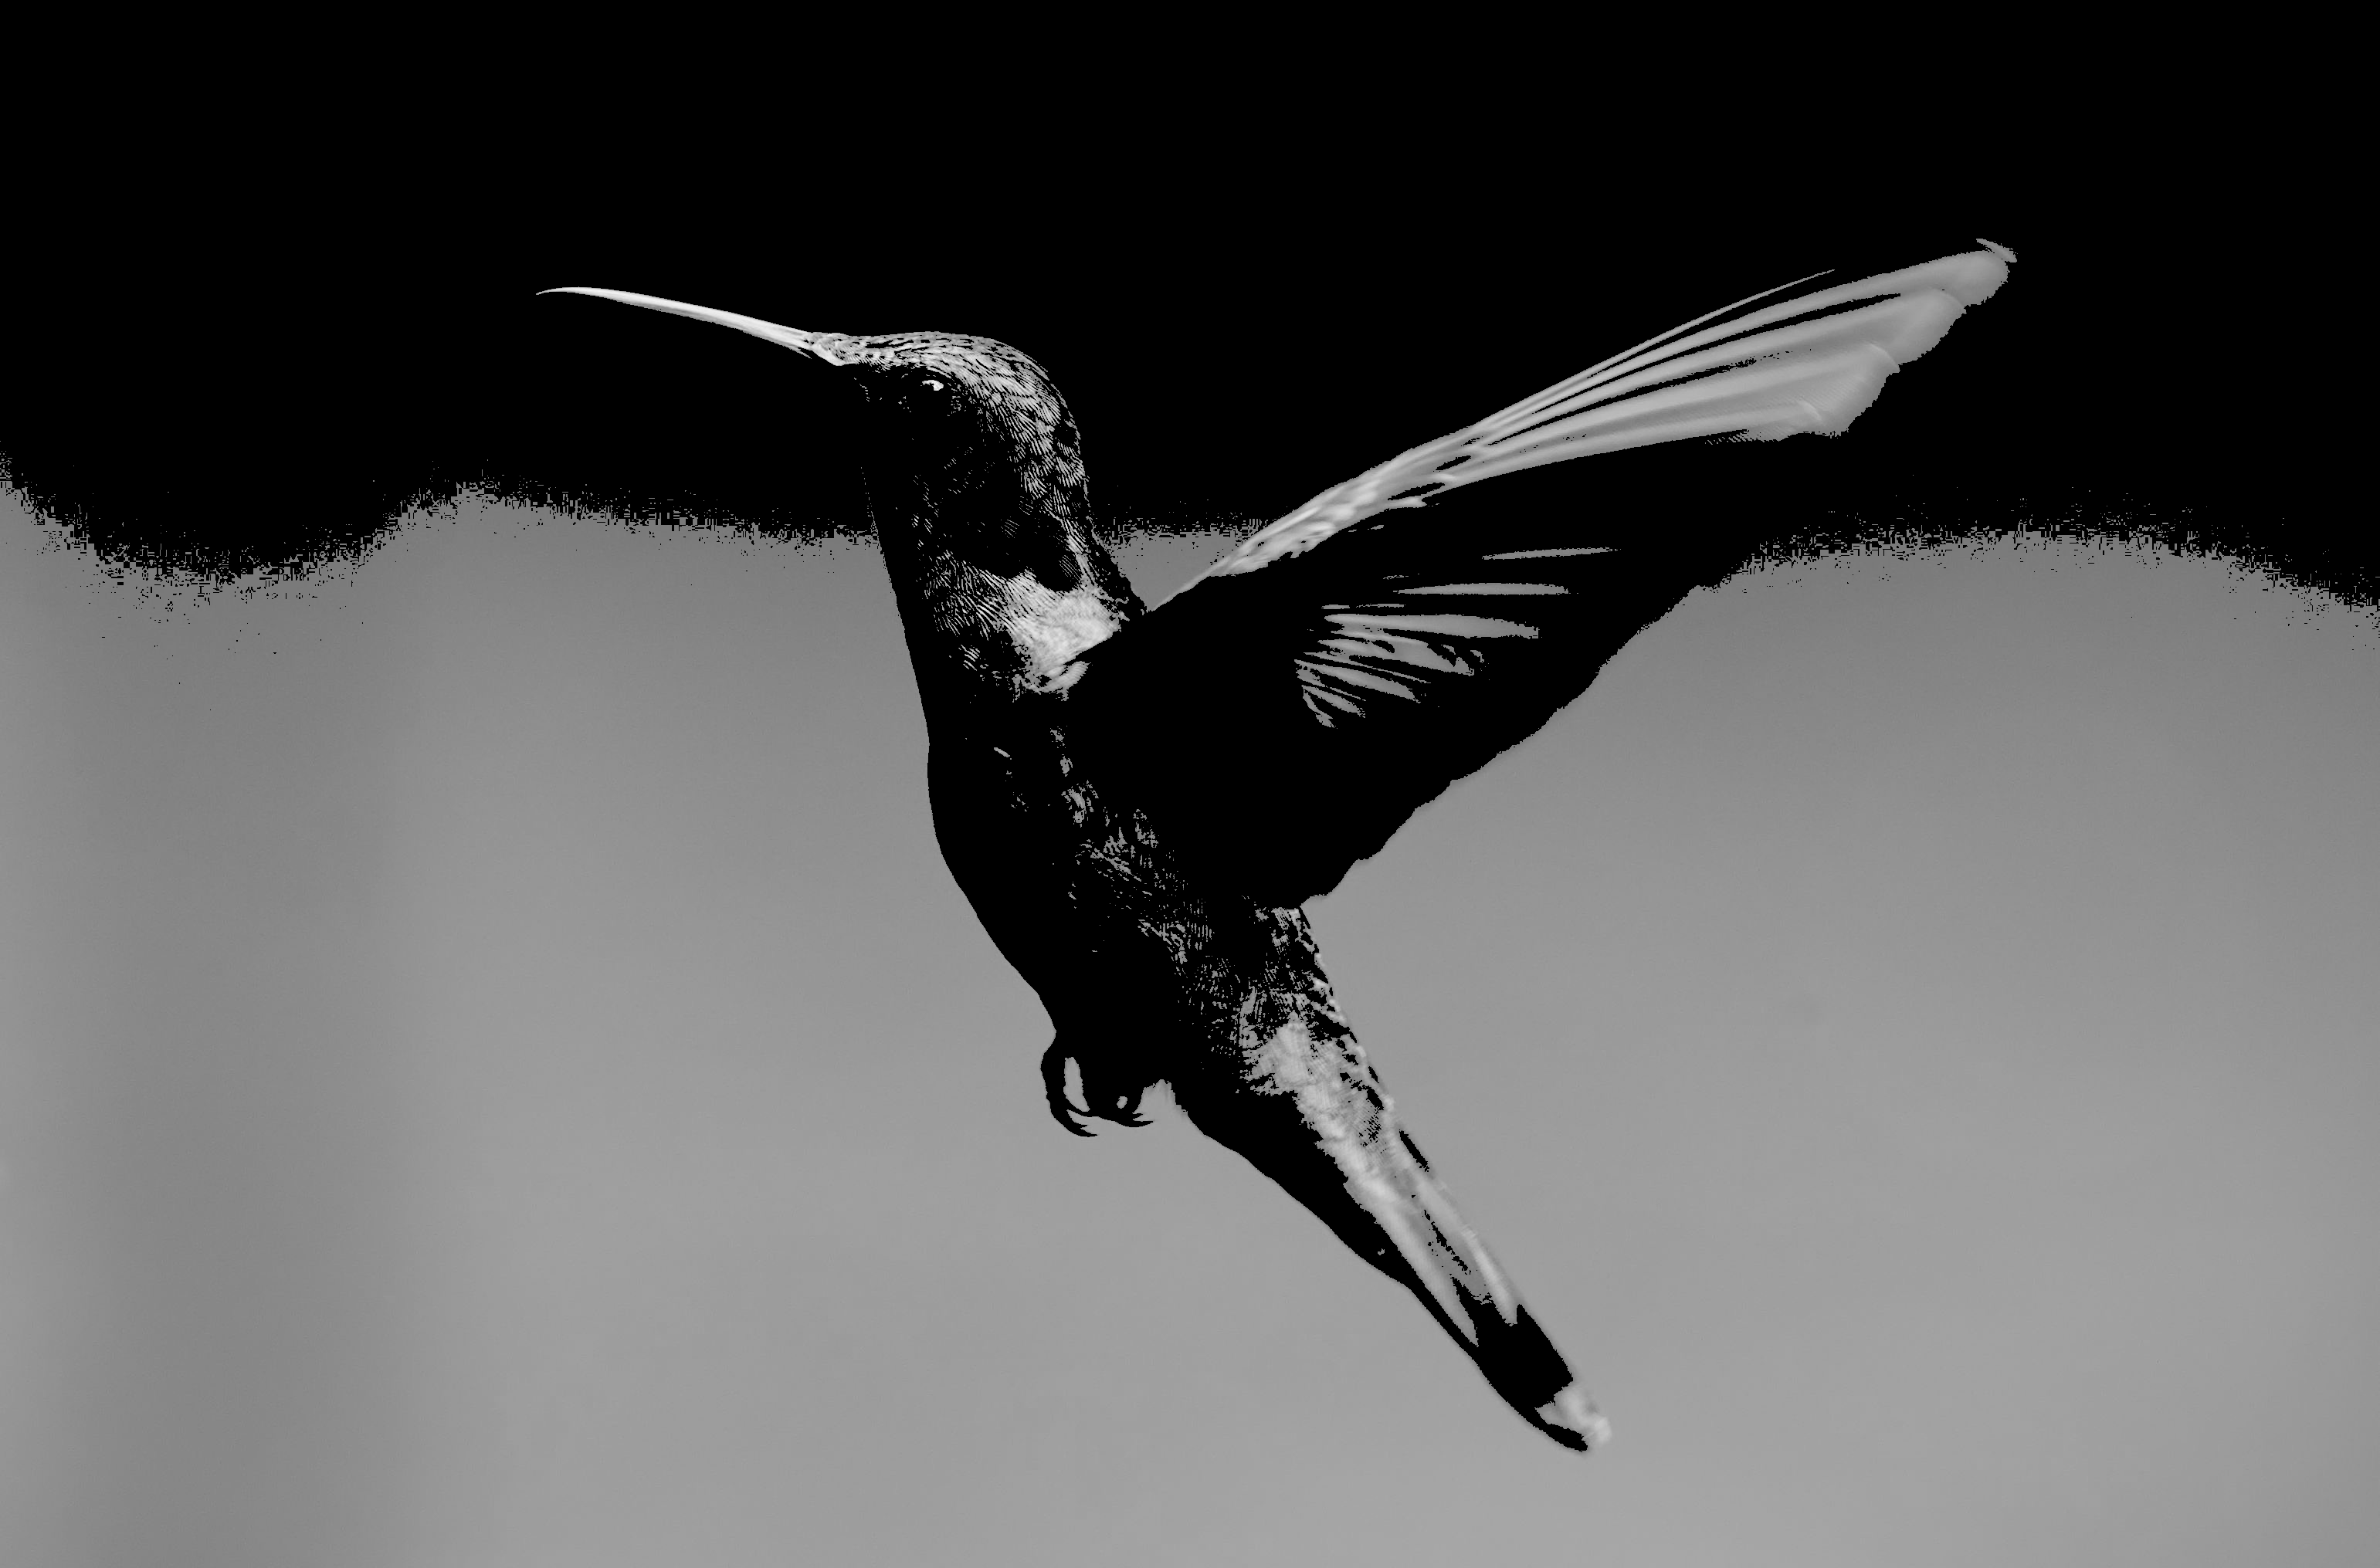

In [135]:

cv2_imshow(thresh4) #'Set to 0',


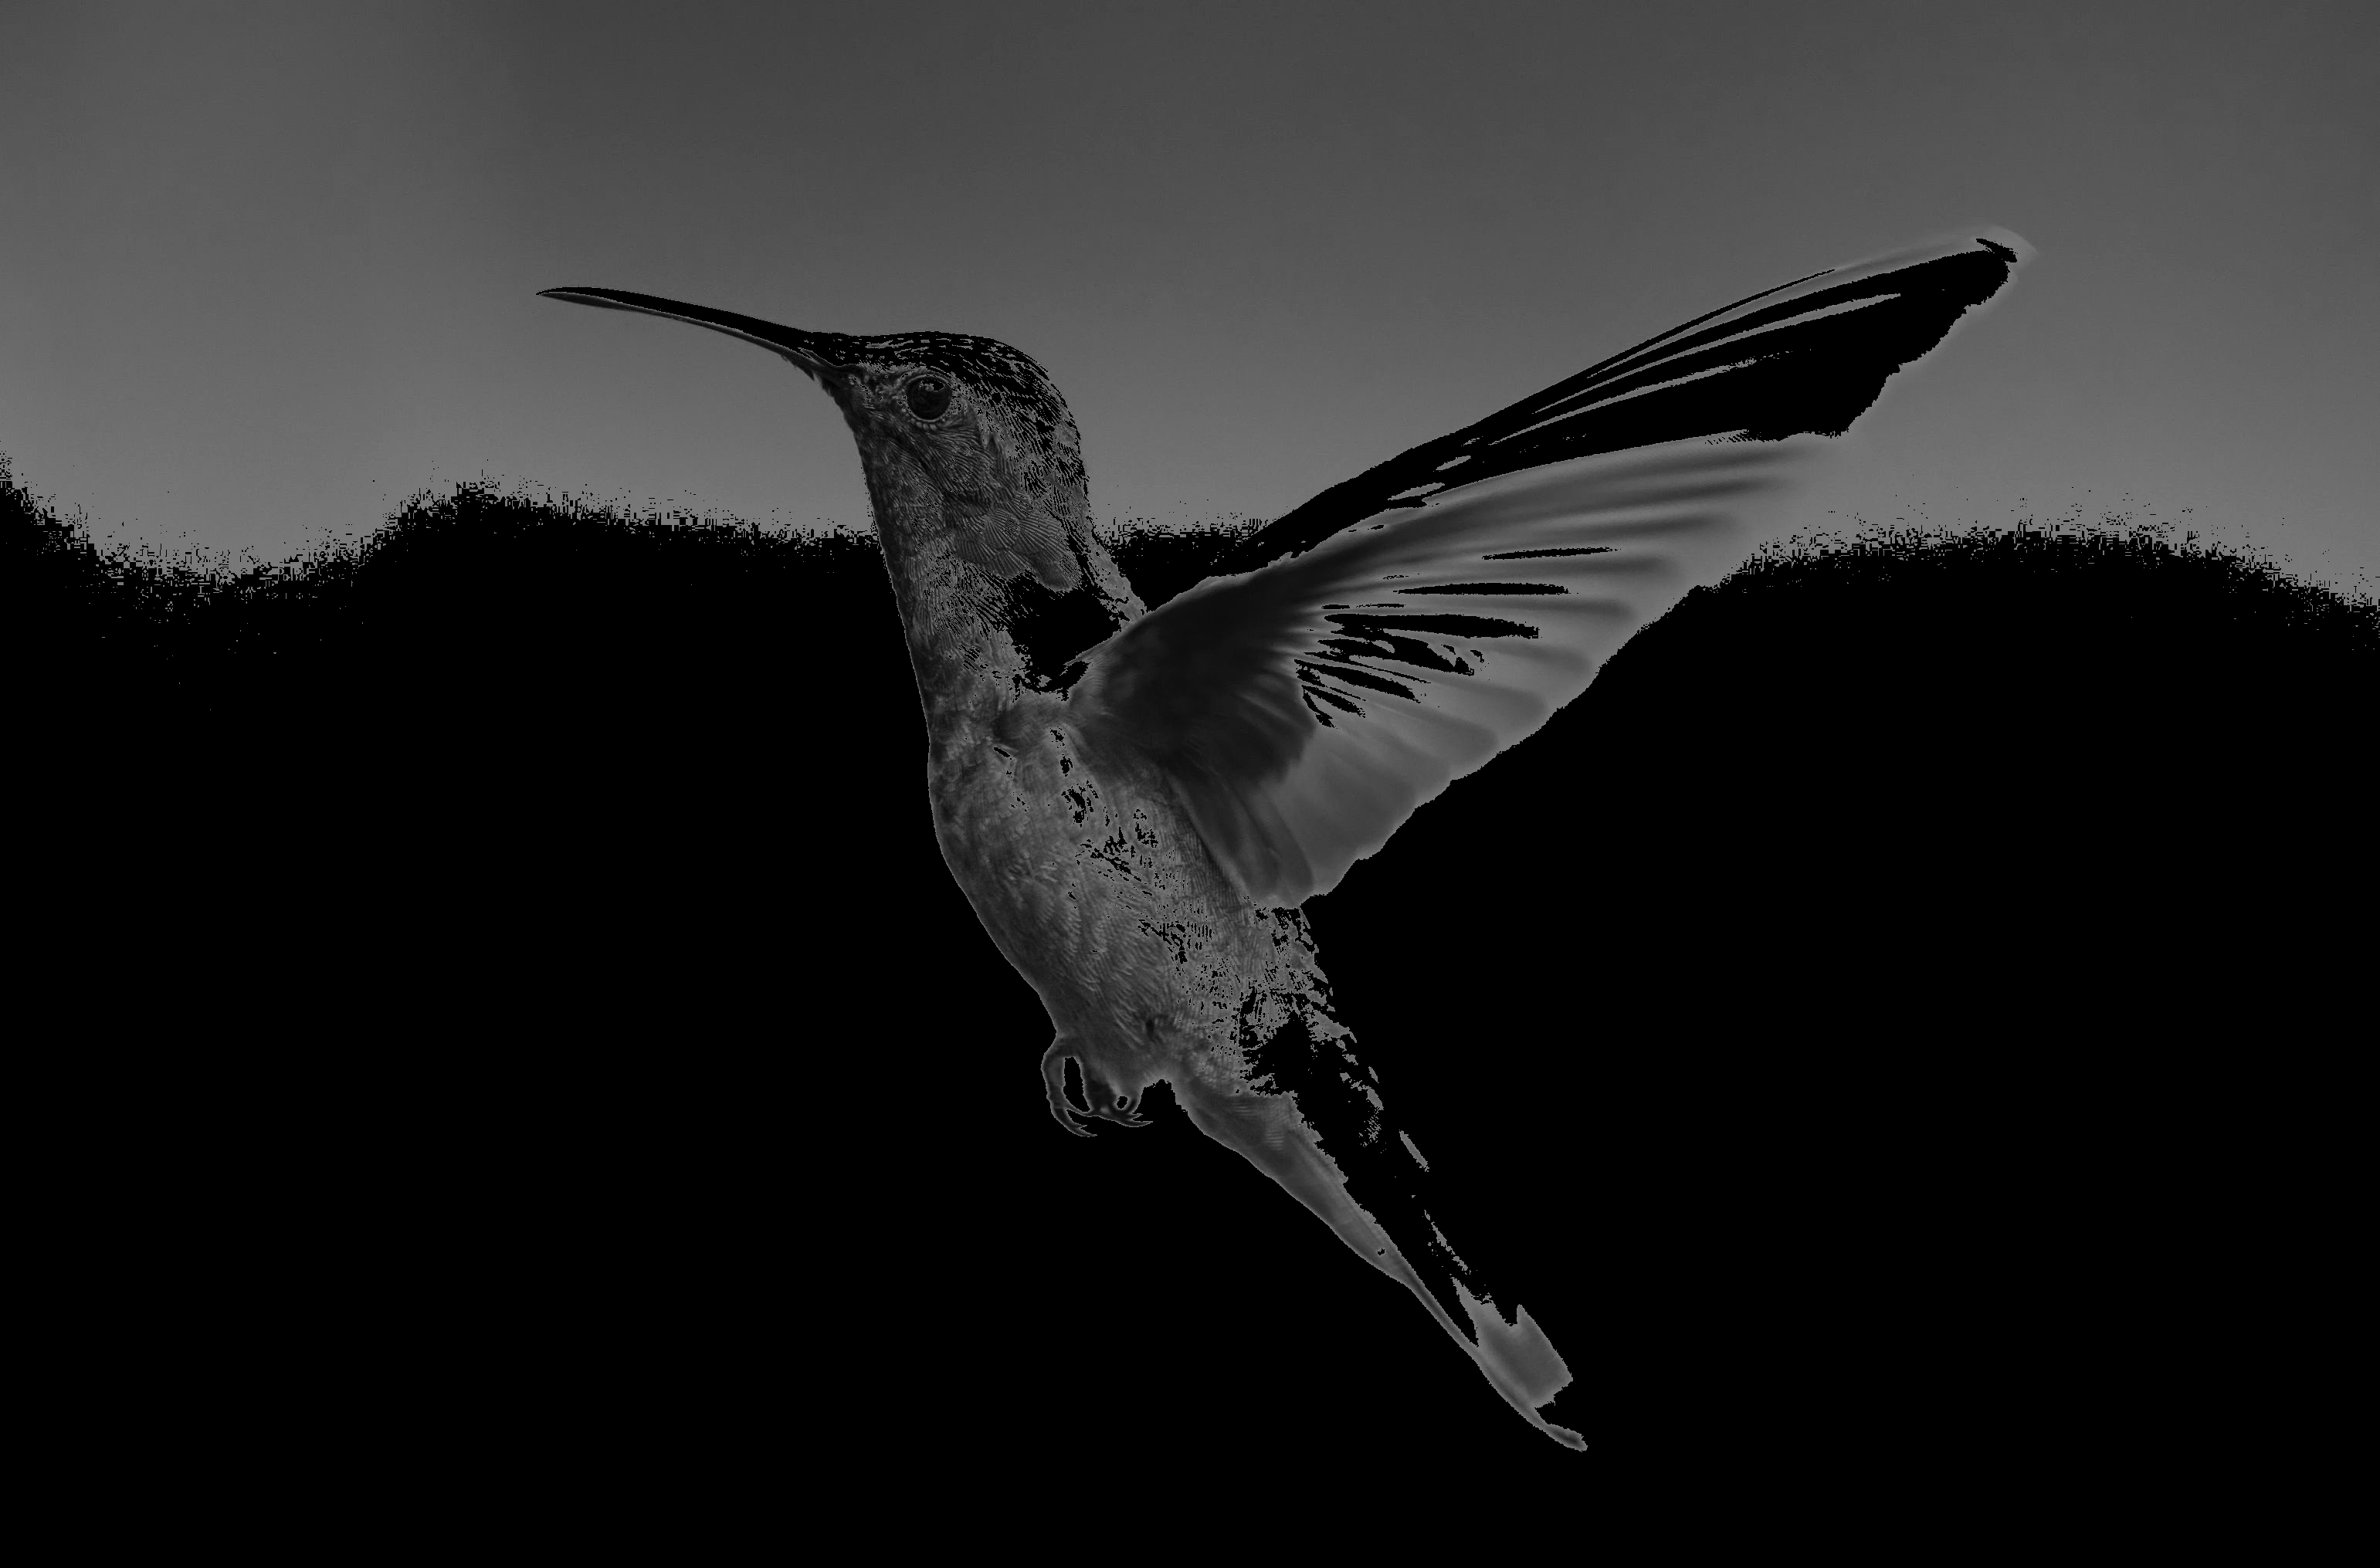

In [136]:

cv2_imshow(thresh5) #'Set to 0 Inverted'

## **Edge Detection**:

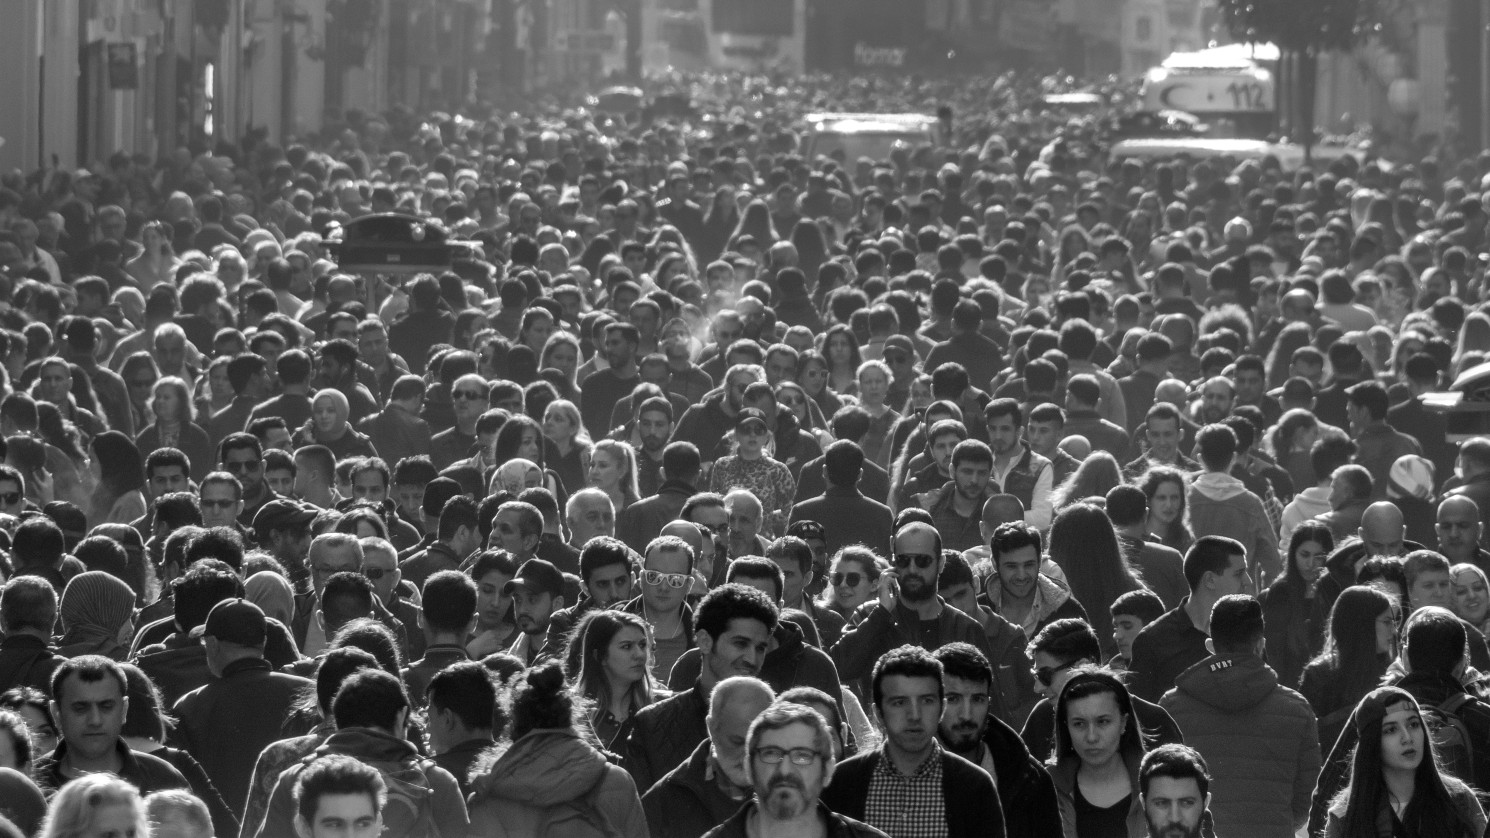

In [137]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img1=cv2.imread("/content/people.jpg",0)

cv2_imshow(img1)


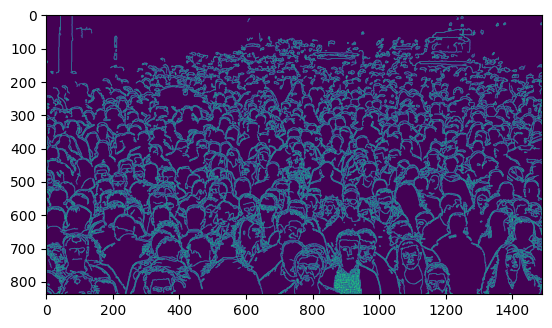

In [139]:
# canny edge detection

# Setting parameter values
t_lower = 50  # Lower Threshold
t_upper = 150  # Upper threshold
  
# Applying the Canny Edge filter
edge = cv2.Canny(img1, t_lower, t_upper)
  
#cv2_imshow(edge)
plt.imshow(edge)

# Image Classification - Using 1.TensorFlow and 2.PyTorch

## Using Tensorflow (MNIST Data)

In [140]:
# Importing dependencies
import tensorflow as tf
from tensorflow import keras


In [141]:

# Get the data

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


11490434/11490434 [==============================] - 0s 0us/step


In [142]:
# Defining the model archietecture and compiling

model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [143]:
# Training the model

history = model.fit(x_train, y_train, epochs=5,batch_size=128, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

Epoch 1/5
375/375 [==============================] - 6s 13ms/step - loss: 0.3523 - accuracy: 0.8964 - val_loss: 0.1675 - val_accuracy: 0.9519
Epoch 2/5
375/375 [==============================] - 7s 17ms/step - loss: 0.1721 - accuracy: 0.9488 - val_loss: 0.1181 - val_accuracy: 0.9646
Epoch 3/5
375/375 [==============================] - 5s 12ms/step - loss: 0.1314 - accuracy: 0.9617 - val_loss: 0.1049 - val_accuracy: 0.9696
Epoch 4/5
375/375 [==============================] - 5s 13ms/step - loss: 0.1067 - accuracy: 0.9682 - val_loss: 0.0876 - val_accuracy: 0.9751
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0769 - accuracy: 0.9770
Test accuracy: 0.9769999980926514


## Using Pytorch (MNIST Data)

In [2]:
# Import Dependencies

import torch
import torch.nn.functional as F
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader 

In [3]:
# Define transformation to be done on data (optional)

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [4]:
# Read trainset and testset along and link to DataLoaders

trainset = datasets.MNIST(root = 'data', download = True, train = True,transform = transform )
trainloader = DataLoader(trainset, batch_size = 128, shuffle = True)

testset = datasets.MNIST(root = 'data', download = True, train = False,transform = transform )
testloader = DataLoader(testset, batch_size = 128, shuffle = True)


100%|██████████| 9912422/9912422 [00:00<00:00, 46085040.26it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 82237402.46it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26717963.42it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17493598.50it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
# Defining the Neural Network

class Network(nn.Module):

  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,16,3,padding = 1)
    self.pool = nn.MaxPool2d(2,2)
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(16*14*14, 512)
    self.fc2 = nn.Linear(512,10)
    self.dropout = nn.Dropout(p=0.5)
  
  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = self.pool(X)
    X = self.flatten(X)
    X = F.relu(self.fc1(X))
    X = self.dropout(X)
    X = F.log_softmax(self.fc2(X),dim = 1)
    return X

In [6]:
# instanciating modle and define loss, optimizer

model = Network().to('cuda')
optimizer = optim.Adam(model.parameters(),lr = 0.003)
criterion = nn.NLLLoss()

In [7]:
# Training Flow

epochs = 5
train_losses, test_losses = [], []
for epoch in range(epochs):
  running_loss = 0
  for images, lables in trainloader:

    images, lables = images.to("cuda"), lables.to("cuda")

    # forward pass
    outputs = model(images)
    loss = criterion(outputs, lables)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    running_loss = loss.item()

  print(f"epoch: {epoch+1} and loss is {running_loss}")

epoch: 0 and loss: 0.033313583582639694
epoch: 1 and loss: 0.17584705352783203
epoch: 2 and loss: 0.12185955792665482
epoch: 3 and loss: 0.15607647597789764
epoch: 4 and loss: 0.012489174492657185


In [9]:
# # Evaluation Flow

# model.eval()

# test_loss = 0
# accuracy = 0

# with torch.no_grad():
#     for images, labels in testloader:
#         images, labels = images.to("cuda"), labels.to("cuda")

#         # forward pass
#         output = model(images)
#         test_loss += criterion(output, labels).item()

#         # calculate accuracy
#         ps = torch.exp(output)
#         top_p, top_class = ps.topk(1, dim=1)
#         equals = top_class == labels.view(*top_class.shape)
#         accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

# print(f"Test Loss: {test_loss/len(testloader):.3f}.. "
#       f"Test Accuracy: {accuracy/len(testloader):.3f}")

Test Loss: 0.037.. Test Accuracy: 0.987


In [10]:
model.eval()

n_correct = 0
n_total = 0

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to("cuda"), labels.to("cuda")

        # forward pass
        output = model(images)

        # calculate accuracy
        _, predicted = torch.max(output.data, 1)
        n_total += labels.size(0)
        n_correct += (predicted == labels).sum().item()

test_accuracy = n_correct / n_total
print(f"Test Accuracy: {test_accuracy:.3f}")

Test Accuracy: 0.987
